# Problem Statement

Using publicly available data at data.gov.sg please create a model pipeline to forecast (upcoming 3 hours) the traffic flow at the specified location (latitude: 1.357098686 longitude: 103.902042), for a specified time of day. The solution must have the following components:

 

Estimation of historical traffic flow, using image data sets available here (https://data.gov.sg/dataset/traffic-images )
Use the pipeline from (1) and weather data (https://data.gov.sg/dataset/realtime-weather-readings), to forecast the traffic flow at the specified location at a specified time of day

* First, of all the problem looks very interesting. 
* Let us explore the images on the given latitude, longitude location. 
* The image url on the lat,long is stored for inference process
* This code scrapes through the json and gets the image URL for the particular latitude and longitude


In [11]:
import pandas as pd

In [29]:
import requests
import urllib
date_list = []
img_list = []
img_url_list = []
for m in range(13,18):
    if m<10:
        m='0'+str(m)
    else:
        m=str(m)
    for j in range(1,2):

        if j<10:
            j='0'+str(j)
        else:
            j=str(j)
        url = r'https://api.data.gov.sg/v1/transport/traffic-images?date_time=2021-08-01T'+m+'%3A'+j+'%3A10'
        date = '2021-08-01T'+m+':'+j+':10'
        resp = requests.get(url)
        json1 = resp.json()
        
        for i in range(0,len(json1['items'][0]['cameras'])):
            # print(json1['items'][0]['cameras'][i]['location'])
            if (json1['items'][0]['cameras'][i]['location']['latitude']==1.357098686) & (json1['items'][0]['cameras'][i]['location']['longitude']==103.902042):
                img_url = json1['items'][0]['cameras'][i]['image']
                img_name = img_url.split('/')[-1]
                try:
                    img_list.append(img_name)
                    date_list.append(date)
    
                    img_url_list.append(img_url)
                    print(img_url)
                    r = requests.get(img_url)
            
                    with open(img_name, "wb") as f:
                        f.write(r.content)
                except:
                    pass

https://images.data.gov.sg/api/traffic-images/2021/08/0abeaddf-2898-4240-8f10-aade2ee6b883.jpg
https://images.data.gov.sg/api/traffic-images/2021/08/d477c1ca-ec0f-45d1-af56-19c81e708503.jpg
https://images.data.gov.sg/api/traffic-images/2021/08/89ac48a9-3a22-4ef1-b20e-a644da22ab89.jpg
https://images.data.gov.sg/api/traffic-images/2021/08/90a070a1-d606-45d4-97bd-34a46e8d9eb8.jpg
https://images.data.gov.sg/api/traffic-images/2021/08/d1c94544-5292-40cc-875d-9abdcded0dd9.jpg


* Check with an image URL to display inference results from out-of-box YoloV5

In [2]:
img_url = 'https://images.data.gov.sg/api/traffic-images/2021/08/d477c1ca-ec0f-45d1-af56-19c81e708503.jpg'

In [3]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


* It has been observed that yolo5l (yolo5 large) is better in performance than yolo5s or yolo5m on this dataset
* Let's check the inference made on an image URL

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-9-9 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 392 layers, 47025981 parameters, 0 gradients
Adding AutoShape... 


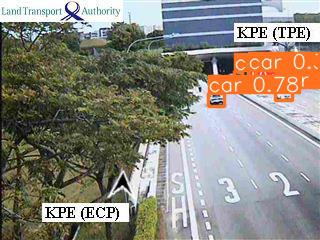

In [30]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5l')  # or yolov5m, yolov5l, yolov5x, custom

# Inference
results = model(img_url)

# Results
results.show()


## Feature Engineering

* Get the dates, image url and the number of cars and collect them for forecasting the traffic for next 3 hours.

In [12]:
traffic_data = pd.DataFrame({'Date':date_list, 'Image URL':img_url_list, 'Image Names':img_list})
traffic_data.head()

,Date,Image URL,Image Names
0,2021-08-01T13:01:10,https://images.data.gov.sg/api/traffic-images/...,0abeaddf-2898-4240-8f10-aade2ee6b883.jpg
1,2021-08-01T14:01:10,https://images.data.gov.sg/api/traffic-images/...,d477c1ca-ec0f-45d1-af56-19c81e708503.jpg
2,2021-08-01T15:01:10,https://images.data.gov.sg/api/traffic-images/...,89ac48a9-3a22-4ef1-b20e-a644da22ab89.jpg
3,2021-08-01T16:01:10,https://images.data.gov.sg/api/traffic-images/...,90a070a1-d606-45d4-97bd-34a46e8d9eb8.jpg
4,2021-08-01T17:01:10,https://images.data.gov.sg/api/traffic-images/...,d1c94544-5292-40cc-875d-9abdcded0dd9.jpg


* Next steps: 
  * Custom Yolo5 training to improve further accuracy of detections
  * After accumulating the historical data, perform forecasting.
  * The LSTM or ARIMAX can be tried out since there will be patterns in traffic. For e.g., less traffic during night times
  * From the weather API, get the weather data and use it for forecasting. 